In [ ]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
def histMatch(img, ref):
  imgB_pdf = plt.hist(img[:,:,0].flatten(), bins=256, range=(-0.5, 255.5), density=True, color='b', alpha=0.5);
  imgG_pdf = plt.hist(img[:,:,1].flatten(), bins=256, range=(-0.5, 255.5), density=True, color='g', alpha=0.5);
  imgR_pdf = plt.hist(img[:,:,2].flatten(), bins=256, range=(-0.5, 255.5), density=True, color='r', alpha=0.5);

  imgB_cdf = np.cumsum(imgB_pdf[0])
  imgG_cdf = np.cumsum(imgG_pdf[0])
  imgR_cdf = np.cumsum(imgR_pdf[0])

  imgB_equ = np.around([[255*imgB_cdf[int(i)] for i in img[j,:,0]] for j in range(img.shape[0])])
  imgG_equ = np.around([[255*imgG_cdf[int(i)] for i in img[j,:,1]] for j in range(img.shape[0])])
  imgR_equ = np.around([[255*imgR_cdf[int(i)] for i in img[j,:,2]] for j in range(img.shape[0])])

  refB_pdf = plt.hist(ref[:,:,0].flatten(), bins=256, range=(-0.5, 255.5), density=True, color='b', alpha=0.5);
  refG_pdf = plt.hist(ref[:,:,1].flatten(), bins=256, range=(-0.5, 255.5), density=True, color='g', alpha=0.5);
  refR_pdf = plt.hist(ref[:,:,2].flatten(), bins=256, range=(-0.5, 255.5), density=True, color='r', alpha=0.5);

  refB_cdf = np.cumsum(refB_pdf[0])
  refG_cdf = np.cumsum(refG_pdf[0])
  refR_cdf = np.cumsum(refR_pdf[0])

  refB_icdf = np.array([np.abs(refB_cdf - i/256).argmin() for i in range(len(refB_cdf))])
  refG_icdf = np.array([np.abs(refG_cdf - i/256).argmin() for i in range(len(refG_cdf))])
  refR_icdf = np.array([np.abs(refR_cdf - i/256).argmin() for i in range(len(refR_cdf))])
  
  imgB_matched = np.array([[refB_icdf[int(i)] for i in imgB_equ[j]] for j in range(imgB_equ.shape[0])])
  imgG_matched = np.array([[refG_icdf[int(i)] for i in imgG_equ[j]] for j in range(imgG_equ.shape[0])])
  imgR_matched = np.array([[refR_icdf[int(i)] for i in imgR_equ[j]] for j in range(imgR_equ.shape[0])])

  img_matched = np.stack((imgB_matched, imgG_matched, imgR_matched), -1)
  return img_matched

array([[[59, 11, 28],
        [57, 10, 25],
        [57, 10, 24],
        ...,
        [55, 10, 17],
        [55, 10, 17],
        [55, 10, 17]],

       [[58, 11, 27],
        [57, 10, 24],
        [57, 10, 25],
        ...,
        [54, 10, 16],
        [55, 10, 17],
        [55, 10, 17]],

       [[57, 10, 25],
        [57, 10, 24],
        [58, 11, 27],
        ...,
        [54, 10, 16],
        [54, 10, 16],
        [54, 10, 16]],

       ...,

       [[16,  0,  4],
        [17,  0,  4],
        [16,  0,  4],
        ...,
        [16,  0,  4],
        [16,  0,  4],
        [17,  0,  5]],

       [[15,  0,  3],
        [16,  0,  4],
        [15,  0,  4],
        ...,
        [17,  0,  5],
        [17,  0,  5],
        [18,  0,  5]],

       [[15,  0,  3],
        [16,  0,  4],
        [15,  0,  4],
        ...,
        [19,  0,  6],
        [19,  0,  6],
        [19,  0,  6]]])

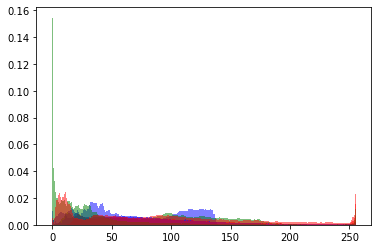

In [ ]:
sunsetbeach = cv2.imread('/content/drive/MyDrive/PDI/sunset-beach.jpg')
sunsetneon = cv2.imread('/content/drive/MyDrive/PDI/sunset-neon.jpg')

histMatch(sunsetbeach, sunsetneon)